In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import shap

data = pd.read_csv('data1026.csv')



In [5]:
data.columns

Index(['index_shangche', 'label_shangche', 'name', 'lat', 'lon',
       'index_xiache', 'label_xiache', 'pop_dens', 'age_0_19', 'age_20_39',
       'age_40_59', 'age_60', 'lu_comm', 'lu_res', 'lu_work', 'lu_pub',
       'dis_pop', 'dis_poi'],
      dtype='object')

In [6]:
pop_feature = ['pop_dens','age_0_19', 'age_20_39', 'age_40_59', 'age_60']
func_feature = ['lu_comm', 'lu_res', 'lu_work', 'lu_pub']
spa_feature = ['lat', 'lon', 'dis_pop', 'dis_poi']

target_up = 'label_shangche'
target_down = 'label_xiache'

pop_x = data[pop_feature]
func_x = data[func_feature]
spa_x = data[spa_feature]

up_y = data[target_up]
down_y = data[target_down]

In [7]:
from scipy.stats import spearmanr

for feature in pop_feature:
    _, p_val = spearmanr(pop_x[feature], up_y)
    print(f'[up][pop]{feature}: {p_val},{p_val<0.05}')

for feature in func_feature:
    _, p_val = spearmanr(func_x[feature], up_y)
    print(f'[up][func]{feature}: {p_val},{p_val<0.05}')

for feature in spa_feature:
    _, p_val = spearmanr(spa_x[feature], up_y)
    print(f'[up][spa]{feature}: {p_val},{p_val<0.05}')

for feature in pop_feature:
    _, p_val = spearmanr(pop_x[feature], down_y)
    print(f'[down][pop]{feature}: {p_val},{p_val<0.05}')

for feature in func_feature:
    _, p_val = spearmanr(func_x[feature], down_y)
    print(f'[down][func]{feature}: {p_val},{p_val<0.05}')

for feature in spa_feature:
    _, p_val = spearmanr(spa_x[feature], down_y)
    print(f'[down][spa]{feature}: {p_val},{p_val<0.05}')


[up][pop]pop_dens: 0.0,True
[up][pop]age_0_19: 0.0,True
[up][pop]age_20_39: 2.8169961007386455e-226,True
[up][pop]age_40_59: 0.00012986235370634862,True
[up][pop]age_60: 7.441895133752755e-110,True
[up][func]lu_comm: 0.0,True
[up][func]lu_res: 0.0,True
[up][func]lu_work: 1.458613105462369e-277,True
[up][func]lu_pub: 2.4351917257729393e-280,True
[up][spa]lat: 2.7992875087953927e-68,True
[up][spa]lon: 7.276762779028636e-08,True
[up][spa]dis_pop: 0.0,True
[up][spa]dis_poi: 0.0,True
[down][pop]pop_dens: 0.0,True
[down][pop]age_0_19: 0.0,True
[down][pop]age_20_39: 0.0,True
[down][pop]age_40_59: 8.887486281857636e-40,True
[down][pop]age_60: 3.50257166743485e-81,True
[down][func]lu_comm: 0.0,True
[down][func]lu_res: 0.0,True
[down][func]lu_work: 0.0,True
[down][func]lu_pub: 2.6197990558358097e-198,True
[down][spa]lat: 8.593126217569602e-18,True
[down][spa]lon: 4.880278901554859e-37,True
[down][spa]dis_pop: 0.0,True
[down][spa]dis_poi: 0.0,True


In [8]:
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
pop_model_up = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)
func_model_up =  RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)
spa_model_up =  RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)

pop_model_up.fit(np.array(pop_x), np.array(up_y))
func_model_up.fit(np.array(func_x), np.array(up_y))
spa_model_up.fit(np.array(spa_x), np.array(up_y))

pop_model_down = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)
func_model_down =  RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)
spa_model_down =  RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed)

pop_model_down.fit(np.array(pop_x), np.array(down_y))
func_model_down.fit(np.array(func_x), np.array(down_y))
spa_model_down.fit(np.array(spa_x), np.array(down_y))



RandomForestClassifier(random_state=42)

In [9]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
mpl.rcParams["axes.unicode_minus"] = False

from matplotlib import pyplot as plt

cmap = plt.get_cmap('tab10')
colors_9 = [cmap(i) for i in range(9)]
colors_10 = [cmap(i) for i in range(10)]
def get_colors(type_value):
    return colors_10[type_value]

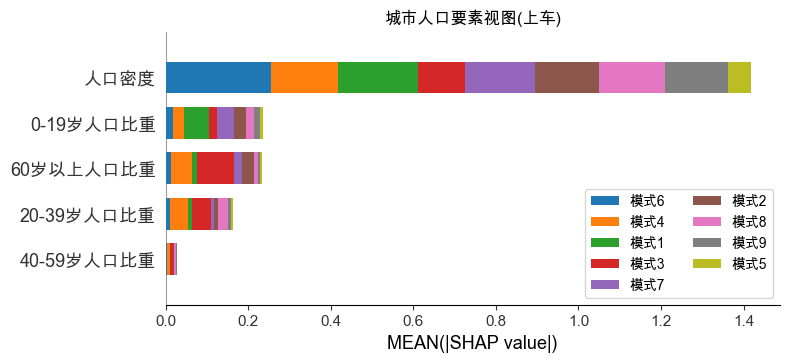

对模式1影响最大的特征是0-19岁人口比重
对模式2影响最大的特征是60岁以上人口比重
对模式3影响最大的特征是60岁以上人口比重
对模式4影响最大的特征是60岁以上人口比重
对模式5影响最大的特征是0-19岁人口比重
对模式6影响最大的特征是0-19岁人口比重
对模式7影响最大的特征是0-19岁人口比重
对模式8影响最大的特征是20-39岁人口比重
对模式9影响最大的特征是0-19岁人口比重


In [10]:

xxx = pop_x
pop_explainer_up = shap.TreeExplainer(pop_model_up)
pop_shap_values_up = pop_explainer_up.shap_values(xxx)
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
fig, ax = plt.subplots()

shap.summary_plot(pop_shap_values_up, xxx, plot_type='bar', color_bar=colors_9, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市人口要素视图(上车)')
plt.savefig('pop_up.png')
plt.show()

for cls_id in range(len(pop_shap_values_up)):
    cls_pop_shap_values_up = pop_shap_values_up[cls_id]
    np.savetxt(f'pop_up_class_{cls_id+1}.csv', cls_pop_shap_values_up, delimiter=',')
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    max_feature = np.argsort(cls_pop_shap_values_up)[-1]
    if max_feature == 0:
        max_feature = np.argsort(cls_pop_shap_values_up)[-2]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')
    
# shap.dependence_plot('pop_dens', pop_shap_values_up[8], xxx)


                 模式1       模式2       模式3       模式4       模式5       模式6  \
0-19岁人口比重   0.060076  0.027324  0.020225  0.026644  0.008576  0.017673   
20-39岁人口比重  0.009820  0.011469  0.046143  0.042818  0.005716  0.011049   
40-59岁人口比重  0.000697  0.002719  0.005822  0.006617  0.001638  0.004078   
60岁以上人口比重   0.012785  0.028734  0.089063  0.048707  0.005176  0.014294   

                 模式7       模式8       模式9  
0-19岁人口比重   0.041856  0.019221  0.014863  
20-39岁人口比重  0.006427  0.023930  0.006530  
40-59岁人口比重  0.001629  0.003598  0.001456  
60岁以上人口比重   0.020825  0.008503  0.006570  


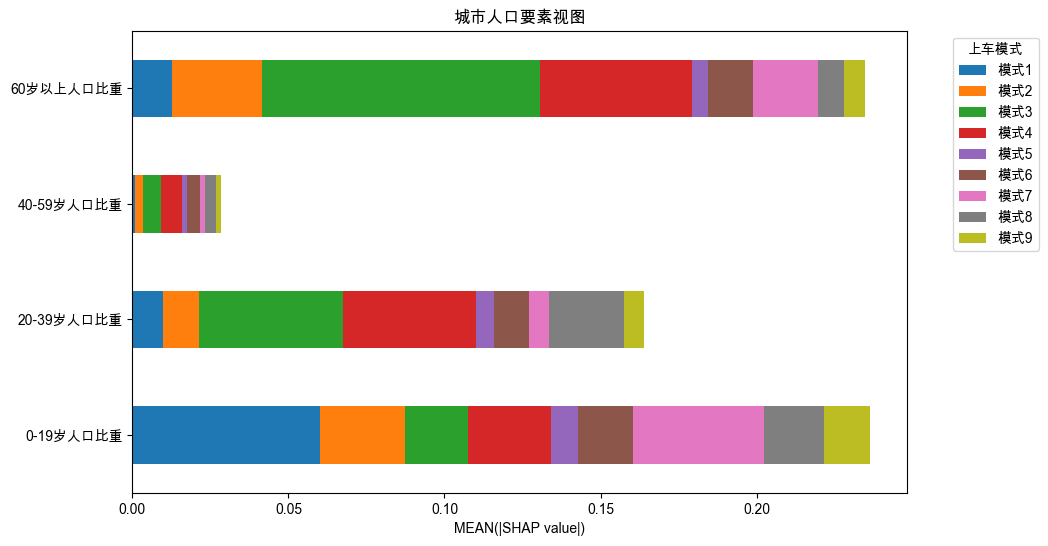

In [24]:
df = []
for cls_id in range(len(pop_shap_values_up)):
    cls_pop_shap_values_up = pop_shap_values_up[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
df = pd.DataFrame(df, index=name, columns=class_name)
df = df.iloc[1:]
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('城市人口要素视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='上车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()


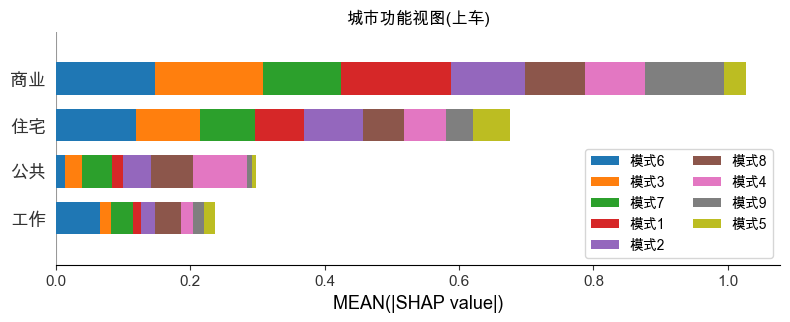

对模式1影响最大的特征是商业
对模式2影响最大的特征是商业
对模式3影响最大的特征是商业
对模式4影响最大的特征是商业
对模式5影响最大的特征是住宅
对模式6影响最大的特征是商业
对模式7影响最大的特征是商业
对模式8影响最大的特征是商业
对模式9影响最大的特征是商业


In [25]:
func_explainer_up = shap.TreeExplainer(func_model_up)
func_shap_values_up = func_explainer_up.shap_values(func_x)

class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
name = ['商业','住宅', '工作', '公共']

fig, ax = plt.subplots()
shap.summary_plot(func_shap_values_up, func_x, plot_type='bar', color_bar=colors_9, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市功能视图(上车)')
plt.savefig('func_up.png')
plt.show()

for cls_id in range(len(func_shap_values_up)):
    cls_func_shap_values_up = func_shap_values_up[cls_id]
    np.savetxt(f'func_up_class_{cls_id+1}.csv', cls_func_shap_values_up, delimiter=',')
    cls_func_shap_values_up = np.abs(cls_func_shap_values_up)
    cls_func_shap_values_up = np.mean(cls_func_shap_values_up, axis=0)
    max_feature = np.argsort(cls_func_shap_values_up)[-1]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')


         模式1       模式2       模式3       模式4       模式5       模式6       模式7  \
商业  0.163244  0.110213  0.159811  0.089184  0.031947  0.148423  0.116145   
住宅  0.073205  0.087556  0.095120  0.063114  0.054891  0.118979  0.082578   
工作  0.011433  0.021216  0.015743  0.017141  0.015610  0.066512  0.033433   
公共  0.015336  0.042145  0.024475  0.079422  0.005728  0.013929  0.045942   

         模式8       模式9  
商业  0.089646  0.117564  
住宅  0.060245  0.040344  
工作  0.038153  0.017097  
公共  0.062691  0.008192  


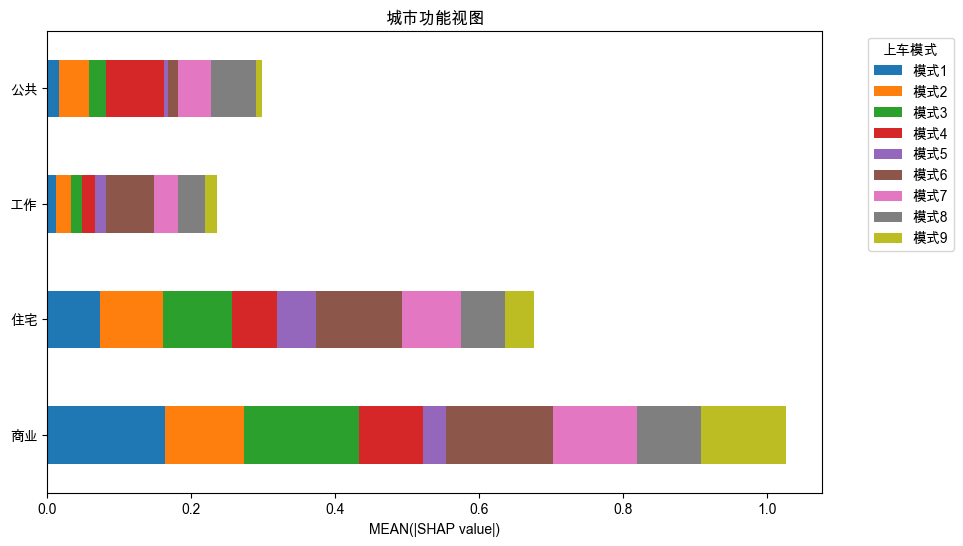

In [27]:
df = []
for cls_id in range(len(func_shap_values_up)):
    cls_pop_shap_values_up = func_shap_values_up[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['商业','住宅', '工作', '公共']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('城市功能视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='上车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

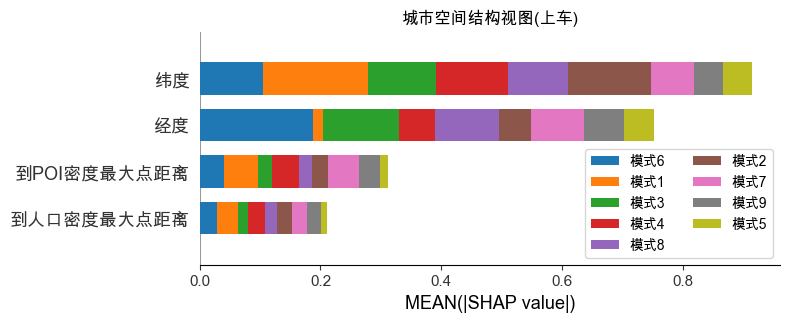

对模式1影响最大的特征是到人口密度最大点距离
对模式2影响最大的特征是到POI密度最大点距离
对模式3影响最大的特征是到POI密度最大点距离
对模式4影响最大的特征是到POI密度最大点距离
对模式5影响最大的特征是到POI密度最大点距离
对模式6影响最大的特征是到POI密度最大点距离
对模式7影响最大的特征是到POI密度最大点距离
对模式8影响最大的特征是到POI密度最大点距离
对模式9影响最大的特征是到POI密度最大点距离


In [28]:
spa_explainer_up = shap.TreeExplainer(spa_model_up)
spa_shap_values_up = spa_explainer_up.shap_values(spa_x)
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
name = ['纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']

fig, ax = plt.subplots()
shap.summary_plot(spa_shap_values_up, spa_x, plot_type='bar', color_bar=colors_9, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市空间结构视图(上车)')
plt.savefig('spa_up.png')
plt.show()

for cls_id in range(len(spa_shap_values_up)):
    cls_spa_shap_values_up = spa_shap_values_up[cls_id]
    np.savetxt(f'spa_up_class_{cls_id+1}.csv', cls_spa_shap_values_up, delimiter=',')
    cls_spa_shap_values_up = np.abs(cls_spa_shap_values_up)
    cls_spa_shap_values_up = np.mean(cls_spa_shap_values_up, axis=0)
    max_feature = np.argsort(cls_spa_shap_values_up)[-3]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')



                  模式1       模式2       模式3       模式4       模式5       模式6  \
纬度           0.173114  0.137756  0.112571  0.119900  0.048155  0.105239   
经度           0.017688  0.054267  0.125212  0.059771  0.050554  0.186872   
到人口密度最大点距离   0.035171  0.025327  0.015964  0.028195  0.009889  0.028908   
到POI密度最大点距离  0.056700  0.026238  0.023019  0.044208  0.012836  0.039756   

                  模式7       模式8       模式9  
纬度           0.071322  0.098950  0.048372  
经度           0.087787  0.105670  0.065415  
到人口密度最大点距离   0.024731  0.019945  0.023387  
到POI密度最大点距离  0.052238  0.022306  0.034195  


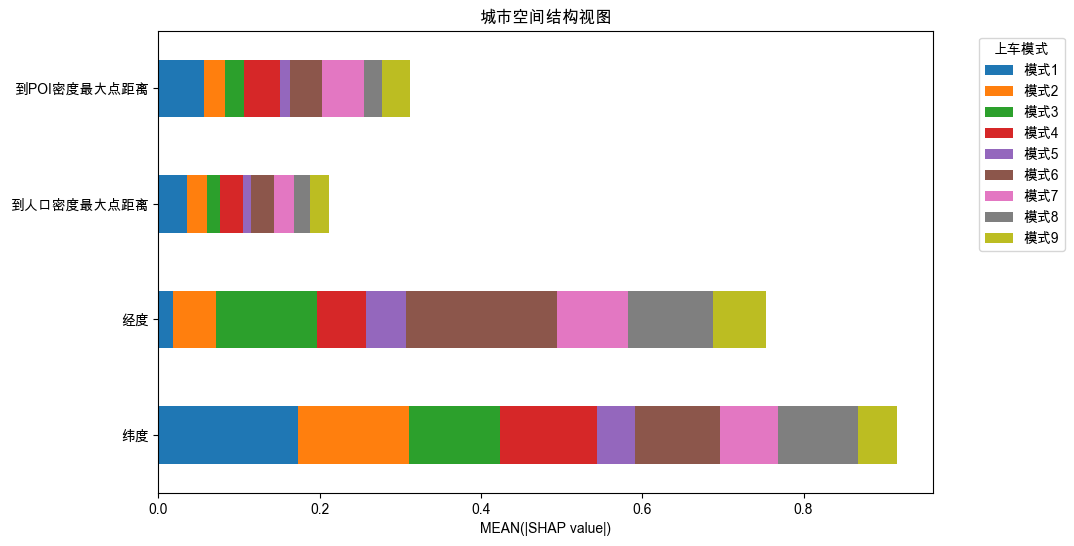

In [29]:
df = []
for cls_id in range(len(spa_shap_values_up)):
    cls_pop_shap_values_up = spa_shap_values_up[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('城市空间结构视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='上车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

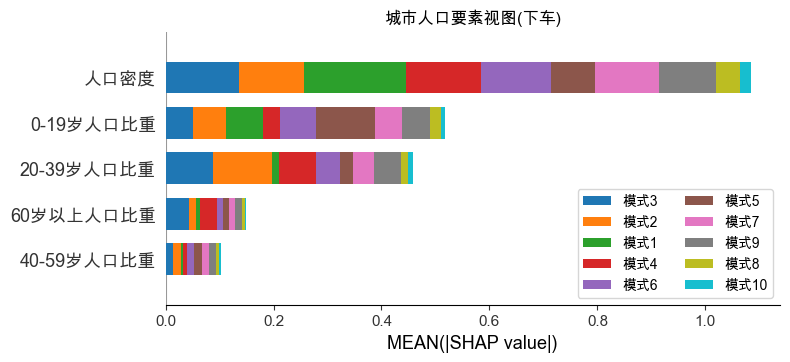

对模式1影响最大的特征是0-19岁人口比重
对模式2影响最大的特征是20-39岁人口比重
对模式3影响最大的特征是20-39岁人口比重
对模式4影响最大的特征是20-39岁人口比重
对模式5影响最大的特征是0-19岁人口比重
对模式6影响最大的特征是0-19岁人口比重
对模式7影响最大的特征是0-19岁人口比重
对模式8影响最大的特征是0-19岁人口比重
对模式9影响最大的特征是0-19岁人口比重
对模式10影响最大的特征是20-39岁人口比重


In [30]:
pop_explainer_down = shap.TreeExplainer(pop_model_down)
pop_shap_values_down = pop_explainer_down.shap_values(pop_x)
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重']

fig, ax = plt.subplots()
shap.summary_plot(pop_shap_values_down, pop_x, plot_type='bar', color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市人口要素视图(下车)')
plt.savefig('pop_down.png')
plt.show()

for cls_id in range(len(pop_shap_values_down)):
    cls_pop_shap_values_down = pop_shap_values_down[cls_id]
    np.savetxt(f'pop_down_class_{cls_id+1}.csv', cls_pop_shap_values_down, delimiter=',')
    cls_pop_shap_values_down = np.abs(cls_pop_shap_values_down)
    cls_pop_shap_values_down = np.mean(cls_pop_shap_values_down, axis=0)
    max_feature = np.argsort(cls_pop_shap_values_down)[-1]
    if max_feature == 0:
        max_feature = np.argsort(cls_pop_shap_values_down)[-2]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')


                 模式1       模式2       模式3       模式4       模式5       模式6  \
0-19岁人口比重   0.068599  0.060856  0.051438  0.031572  0.109638  0.065899   
20-39岁人口比重  0.013146  0.108541  0.087919  0.068226  0.023281  0.045438   
40-59岁人口比重  0.003629  0.013971  0.014600  0.007711  0.014631  0.013608   
60岁以上人口比重   0.006690  0.012391  0.043932  0.032181  0.011188  0.011769   

                 模式7       模式8       模式9      模式10  
0-19岁人口比重   0.050308  0.020343  0.051987  0.006507  
20-39岁人口比重  0.040084  0.013807  0.048732  0.008281  
40-59岁人口比重  0.012745  0.006023  0.011672  0.004524  
60岁以上人口比重   0.010582  0.005544  0.013101  0.002058  


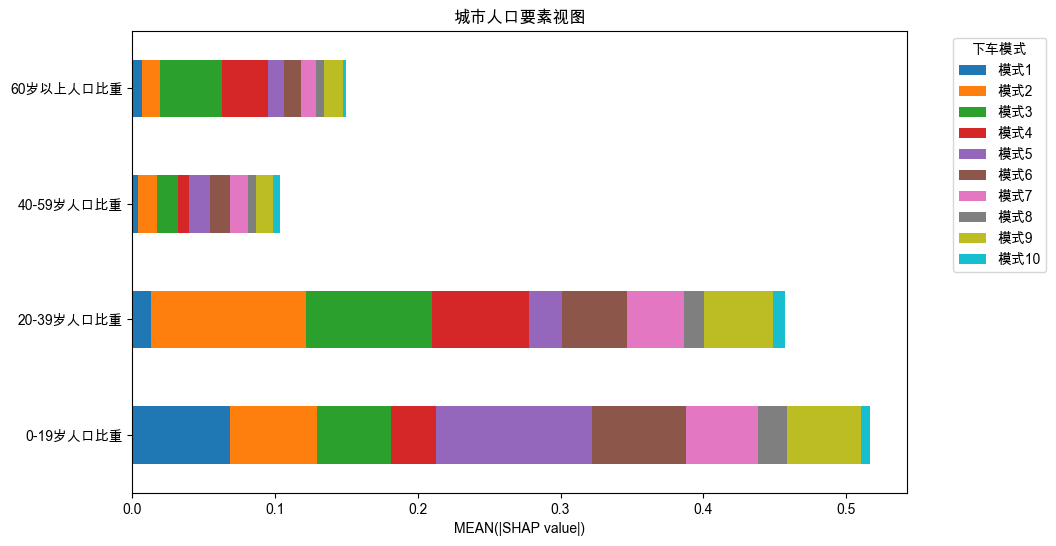

In [31]:
df = []
for cls_id in range(len(pop_shap_values_down)):
    cls_pop_shap_values_up = pop_shap_values_down[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重']
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
df = pd.DataFrame(df, index=name, columns=class_name)
df = df.iloc[1:]
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_10)

# 设置标题和标签
ax.set_title('城市人口要素视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='下车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

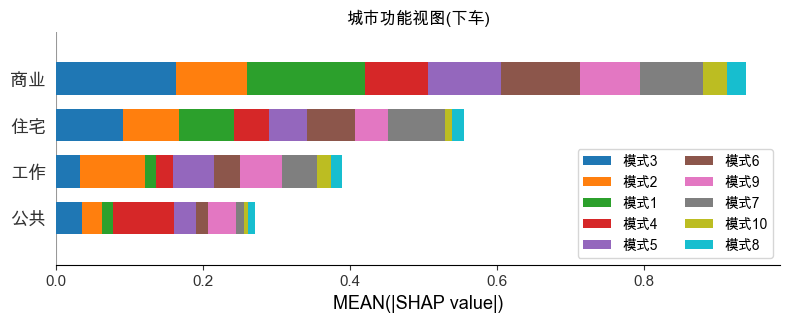

对模式1影响最大的特征是商业
对模式2影响最大的特征是商业
对模式3影响最大的特征是商业
对模式4影响最大的特征是商业
对模式5影响最大的特征是商业
对模式6影响最大的特征是商业
对模式7影响最大的特征是商业
对模式8影响最大的特征是商业
对模式9影响最大的特征是商业
对模式10影响最大的特征是商业


In [32]:
func_explainer_down = shap.TreeExplainer(func_model_down)
func_shap_values_down = func_explainer_down.shap_values(func_x)
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
name = ['商业','住宅', '工作', '公共']

fig, ax = plt.subplots()
shap.summary_plot(func_shap_values_down, func_x, plot_type='bar', color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市功能视图(下车)')
plt.savefig('func_down.png')
plt.show()

for cls_id in range(len(func_shap_values_down)):
    cls_func_shap_values_down = func_shap_values_down[cls_id]
    np.savetxt(f'func_down_class_{cls_id+1}.csv', cls_func_shap_values_down, delimiter=',')
    cls_func_shap_values_down = np.abs(cls_func_shap_values_down)
    cls_func_shap_values_down = np.mean(cls_func_shap_values_down, axis=0)
    max_feature = np.argsort(cls_func_shap_values_down)[-1]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')

         模式1       模式2       模式3       模式4       模式5       模式6       模式7  \
商业  0.160553  0.097221  0.163365  0.085881  0.098319  0.107441  0.085587   
住宅  0.075010  0.075259  0.092139  0.047885  0.050927  0.065902  0.077589   
工作  0.014594  0.088734  0.032645  0.024143  0.054678  0.036325  0.046613   
公共  0.015065  0.027591  0.035621  0.082750  0.029485  0.016185  0.011298   

         模式8       模式9      模式10  
商业  0.024568  0.082236  0.033044  
住宅  0.017133  0.045048  0.009037  
工作  0.014891  0.057046  0.019875  
公共  0.009494  0.037845  0.005182  


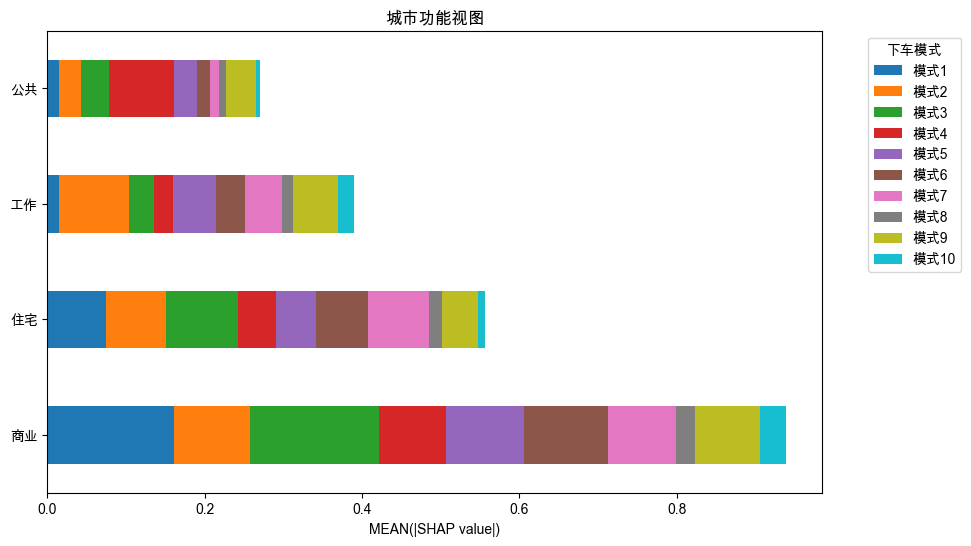

In [34]:
df = []
for cls_id in range(len(func_shap_values_down)):
    cls_pop_shap_values_up = func_shap_values_down[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['商业','住宅', '工作', '公共']
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_10)

# 设置标题和标签
ax.set_title('城市功能视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='下车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

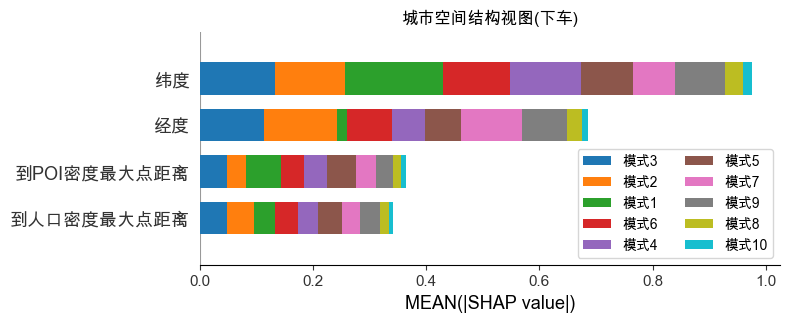

对模式1影响最大的特征是到人口密度最大点距离
对模式2影响最大的特征是到人口密度最大点距离
对模式3影响最大的特征是到POI密度最大点距离
对模式4影响最大的特征是到POI密度最大点距离
对模式5影响最大的特征是到POI密度最大点距离
对模式6影响最大的特征是到POI密度最大点距离
对模式7影响最大的特征是到POI密度最大点距离
对模式8影响最大的特征是到人口密度最大点距离
对模式9影响最大的特征是到人口密度最大点距离
对模式10影响最大的特征是到POI密度最大点距离


In [35]:
spa_explainer_down = shap.TreeExplainer(spa_model_down)
spa_shap_values_down = spa_explainer_down.shap_values(spa_x)
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
name = ['纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']

fig, ax = plt.subplots()
shap.summary_plot(spa_shap_values_down, spa_x, plot_type='bar', color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('城市空间结构视图(下车)')
plt.savefig('spa_down.png')
plt.show()

for cls_id in range(len(spa_shap_values_down)):
    cls_spa_shap_values_down = spa_shap_values_down[cls_id]
    np.savetxt(f'spa_down_class_{cls_id+1}.csv', cls_spa_shap_values_down, delimiter=',')
    cls_spa_shap_values_down = np.abs(cls_spa_shap_values_down)
    cls_spa_shap_values_down = np.mean(cls_spa_shap_values_down, axis=0)
    max_feature = np.argsort(cls_spa_shap_values_down)[-3]
    print(f'对模式{cls_id+1}影响最大的特征是{name[max_feature]}')


                  模式1       模式2       模式3       模式4       模式5       模式6  \
纬度           0.172596  0.124388  0.132432  0.125116  0.091878  0.118249   
经度           0.017262  0.129579  0.112793  0.057897  0.064768  0.079765   
到人口密度最大点距离   0.036571  0.047975  0.048243  0.035019  0.042661  0.041437   
到POI密度最大点距离  0.060877  0.033522  0.049066  0.040269  0.051374  0.041591   

                  模式7       模式8       模式9      模式10  
纬度           0.074457  0.032206  0.089233  0.015694  
经度           0.107864  0.026702  0.079082  0.009852  
到人口密度最大点距离   0.030743  0.015581  0.035934  0.007193  
到POI密度最大点距离  0.034809  0.013978  0.029508  0.008977  


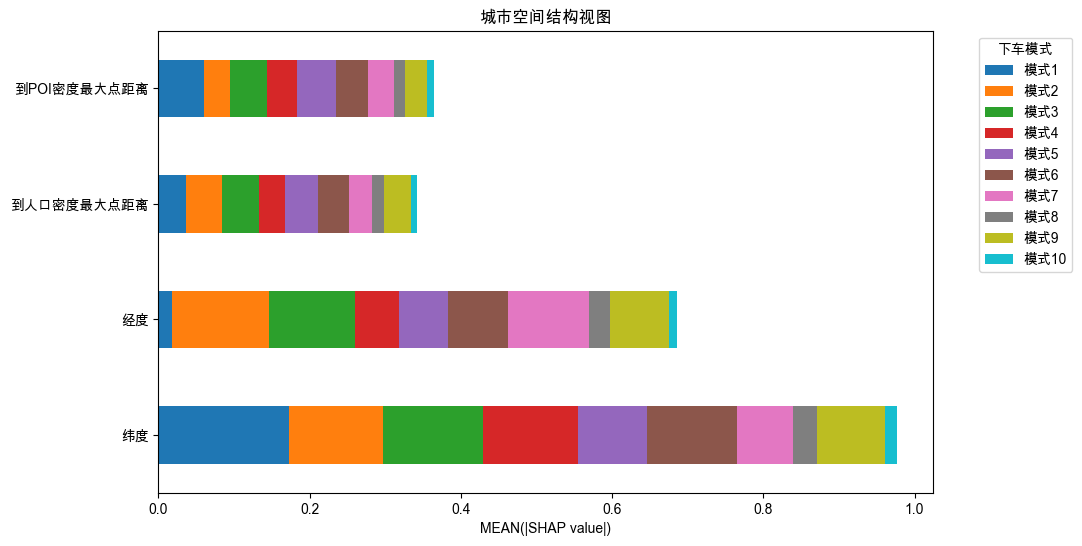

In [36]:
df = []
for cls_id in range(len(spa_shap_values_down)):
    cls_pop_shap_values_up = spa_shap_values_down[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_10)

# 设置标题和标签
ax.set_title('城市空间结构视图')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='下车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

pop_view_up_result = pop_model_up.predict(pop_x)
func_view_up_result = func_model_up.predict(func_x)
spa_view_up_result = spa_model_up.predict(spa_x)
all_view_up = np.array([pop_view_up_result,func_view_up_result,spa_view_up_result]).T
up_logreg = LogisticRegression(max_iter=100000)
up_logreg.fit(all_view_up, up_y)

up_coefficients = up_logreg.coef_

print("Coefficients:")
for i, coef in enumerate(up_coefficients[0]):
    print(f"[up]Feature {i+1}: {coef}")

# 获取截距
up_intercept = up_logreg.intercept_
print(f"[up]Intercept: {up_intercept[0]}")

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


Coefficients:
[up]Feature 1: -10.388963971859441
[up]Feature 2: -10.387908134522856
[up]Feature 3: -10.388901170614387
[up]Intercept: 83.52685219852961


In [38]:
from sklearn.linear_model import LogisticRegression

pop_view_down_result = pop_model_down.predict(pop_x)
func_view_down_result = func_model_down.predict(func_x)
spa_view_down_result = spa_model_down.predict(spa_x)
all_view_down = np.array([pop_view_down_result,func_view_down_result,spa_view_down_result]).T
down_logreg = LogisticRegression(max_iter=100000)
down_logreg.fit(all_view_down, down_y)

down_coefficients = down_logreg.coef_

print("Coefficients:")
for i, coef in enumerate(down_coefficients[0]):
    print(f"[down]Feature {i+1}: {coef}")

# 获取截距
down_intercept = down_logreg.intercept_
print(f"[down]Intercept: {down_intercept[0]}")

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


Coefficients:
[down]Feature 1: -11.214589642569612
[down]Feature 2: -11.180101283604662
[down]Feature 3: -11.21442768812804
[down]Intercept: 95.69510296123904


X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


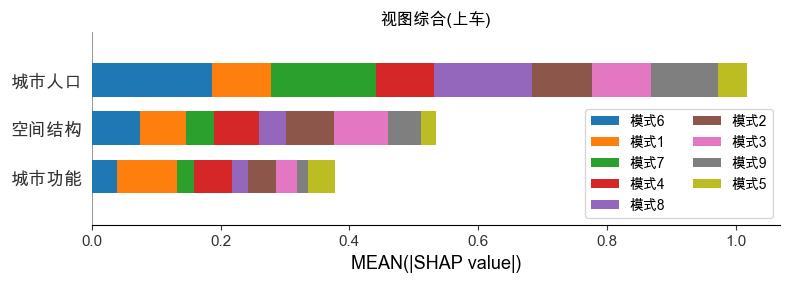

In [40]:
pop_view_up_result = pop_model_up.predict(pop_x)
func_view_up_result = func_model_up.predict(func_x)
spa_view_up_result = spa_model_up.predict(spa_x)
all_view_up = np.array([pop_view_up_result,func_view_up_result,spa_view_up_result]).T

up_rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=seed)
up_rf.fit(all_view_up, up_y)

up_explainer = shap.TreeExplainer(up_rf)
up_shap_values = up_explainer.shap_values(all_view_up)
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
name = ['城市人口','城市功能', '空间结构']

fig, ax = plt.subplots()
shap.summary_plot(up_shap_values, all_view_up, plot_type='bar', color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=2)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('视图综合(上车)')
plt.savefig('all_up.png')
plt.show()


           模式1       模式2       模式3       模式4       模式5       模式6       模式7  \
城市人口  0.091947  0.093309  0.092443  0.089685  0.044683  0.186796  0.163171   
城市功能  0.092266  0.044321  0.032036  0.059694  0.042779  0.039681  0.026851   
空间结构  0.071837  0.073730  0.084540  0.069438  0.023428  0.074633  0.043165   

           模式8       模式9  
城市人口  0.151299  0.104401  
城市功能  0.023708  0.016985  
空间结构  0.042768  0.050617  


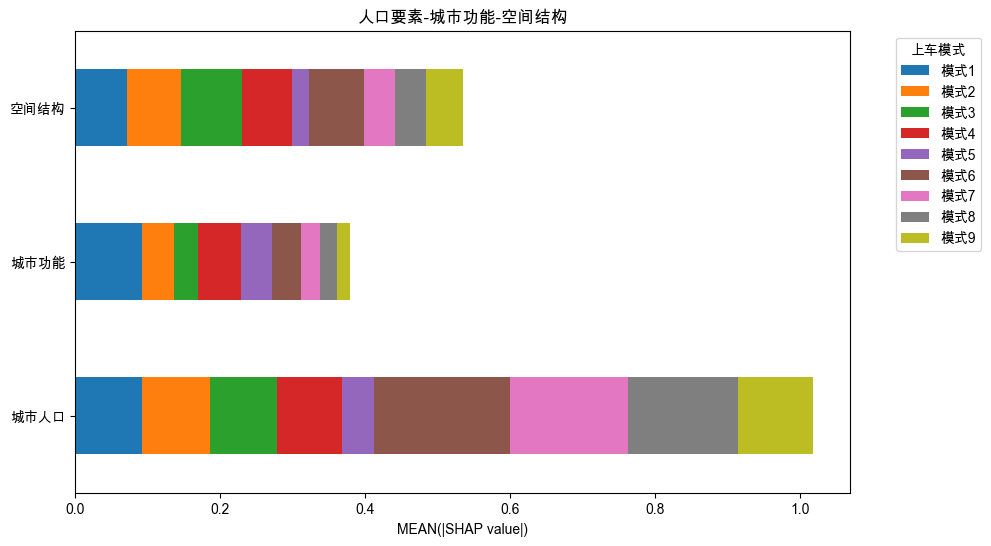

In [41]:
df = []
for cls_id in range(len(up_shap_values)):
    cls_pop_shap_values_up = up_shap_values[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['城市人口','城市功能', '空间结构']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('人口要素-城市功能-空间结构')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='上车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


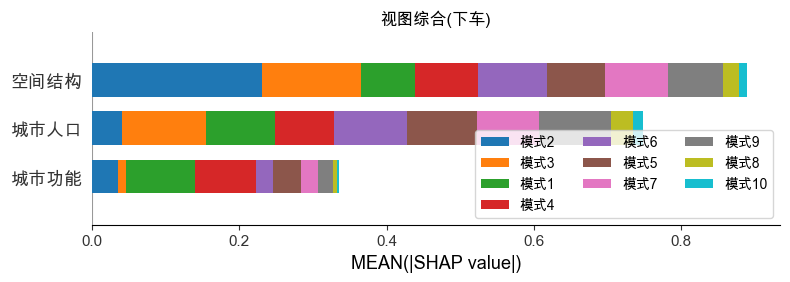

In [42]:
pop_view_down_result = pop_model_down.predict(pop_x)
func_view_down_result = func_model_down.predict(func_x)
spa_view_down_result = spa_model_down.predict(spa_x)
all_view_down = np.array([pop_view_down_result,func_view_down_result,spa_view_down_result]).T

down_rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=seed)
down_rf.fit(all_view_down, down_y)

down_explainer = shap.TreeExplainer(down_rf)
down_shap_values = down_explainer.shap_values(all_view_down)
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
name = ['城市人口','城市功能', '空间结构']

fig, ax = plt.subplots()
shap.summary_plot(down_shap_values, all_view_down, plot_type='bar', color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=3)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('视图综合(下车)')
plt.savefig('all_down.png')
plt.show()

           模式1       模式2       模式3       模式4       模式5       模式6       模式7  \
城市人口  0.092948  0.041718  0.113841  0.080109  0.094036  0.099515  0.084769   
城市功能  0.093213  0.035017  0.011961  0.082959  0.037751  0.022662  0.023720   
空间结构  0.072633  0.231257  0.134393  0.085708  0.077924  0.094080  0.086136   

           模式8       模式9      模式10  
城市人口  0.028742  0.098064  0.014158  
城市功能  0.005104  0.020298  0.002573  
空间结构  0.020951  0.074649  0.011612  


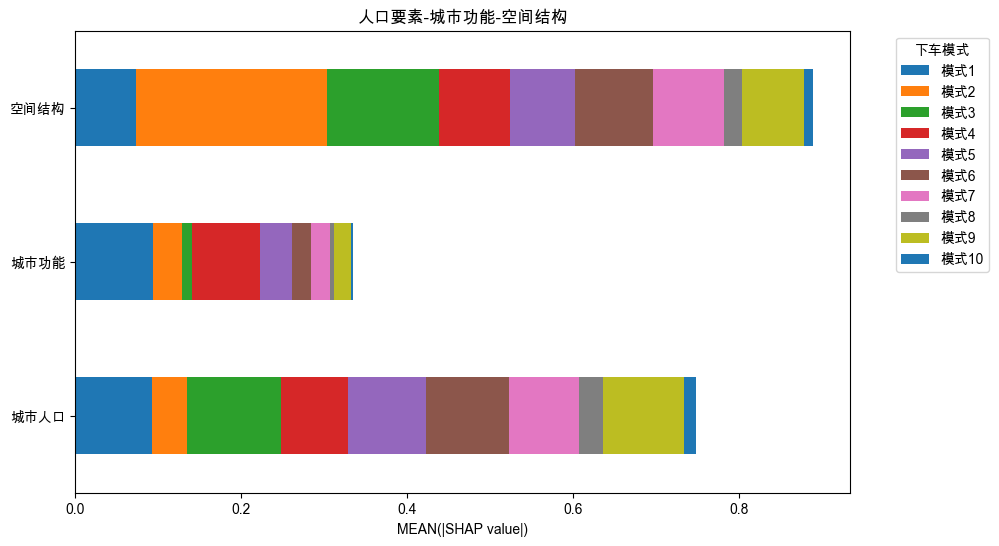

In [43]:
df = []
for cls_id in range(len(down_shap_values)):
    cls_pop_shap_values_up = down_shap_values[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['城市人口','城市功能', '空间结构']
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
df = pd.DataFrame(df, index=name, columns=class_name)
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('人口要素-城市功能-空间结构')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='下车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

100%|██████████| 100/100 [01:45<00:00,  1.06s/it]


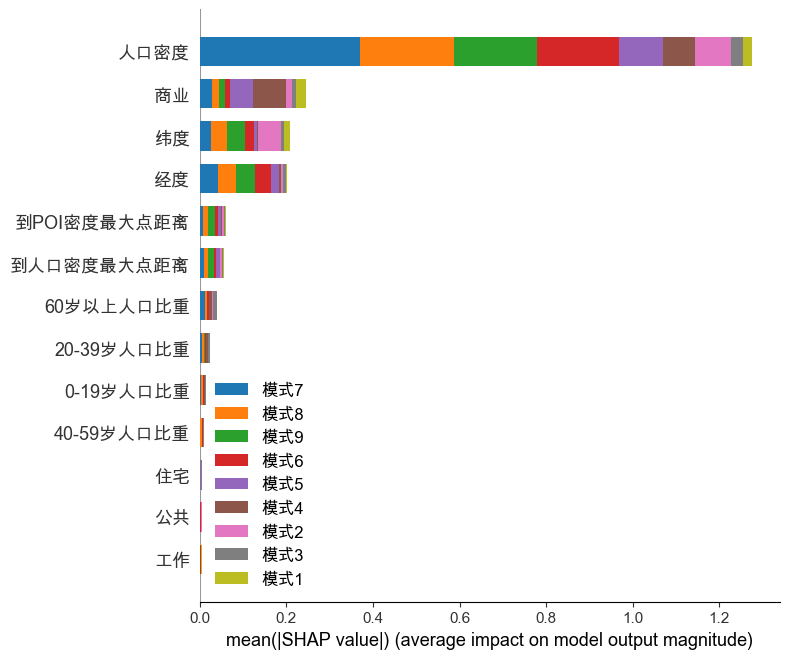

In [44]:
all_pop_view_up_result = pop_model_up.predict(np.array(pop_x))
all_func_view_up_result = func_model_up.predict(np.array(func_x))
all_spa_view_up_result = spa_model_up.predict(np.array(spa_x))
all_all_view_up = np.array([all_pop_view_up_result,all_func_view_up_result,all_spa_view_up_result]).T
all_up_rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=seed)
all_up_rf.fit(all_all_view_up, np.array(up_y))
def all_view_up_model(X):
    all_pop_view_up_result = pop_model_up.predict(X[:,0:5])
    all_func_view_up_result = func_model_up.predict(X[:,5:9])
    all_spa_view_up_result = spa_model_up.predict(X[:,9:13])
    
    all_all_view_up = np.array([all_pop_view_up_result,all_func_view_up_result,all_spa_view_up_result]).T
    return all_up_rf.predict_proba(all_all_view_up)

fn = ['pop_dens','age_0_19', 'age_20_39', 'age_40_59', 'age_60', 'lu_comm', 'lu_res', 'lu_work', 'lu_pub', 'lat', 'lon', 'dis_pop', 'dis_poi']
all_view_up_explainer = shap.KernelExplainer(all_view_up_model, shap.sample(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)),50))
all_view_up_shap_values = all_view_up_explainer.shap_values(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:100]))
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重','商业','住宅', '工作', '公共','纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
shap.summary_plot(all_view_up_shap_values, pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:100], plot_type="bar", color_bar=colors_9, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=1)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('上车')
plt.savefig('all_all_up.png')
plt.show()
#all_view_down_shap_inter =  all_view_down_explainer.shap_interaction_values(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:10]))

                  模式1       模式2       模式3       模式4       模式5       模式6  \
0-19岁人口比重    0.000029  0.000381  0.001929  0.001480  0.000588  0.000770   
20-39岁人口比重   0.000028  0.000402  0.005049  0.004445  0.000510  0.000588   
40-59岁人口比重   0.000032  0.000270  0.001269  0.001099  0.000298  0.000503   
60岁以上人口比重    0.000028  0.001134  0.010268  0.006531  0.001436  0.002980   
商业           0.021600  0.013993  0.009527  0.077338  0.052609  0.012449   
住宅           0.000029  0.000171  0.000620  0.001054  0.000786  0.000484   
工作           0.000030  0.000195  0.000247  0.000974  0.000638  0.000632   
公共           0.000029  0.000162  0.000276  0.000954  0.000630  0.000612   
纬度           0.014487  0.051198  0.006617  0.003813  0.006798  0.019441   
经度           0.001412  0.006145  0.006590  0.004619  0.017909  0.037171   
到人口密度最大点距离   0.002519  0.005159  0.002243  0.001148  0.007351  0.006279   
到POI密度最大点距离  0.001208  0.005702  0.002370  0.001387  0.007549  0.006369   

                  模式7   

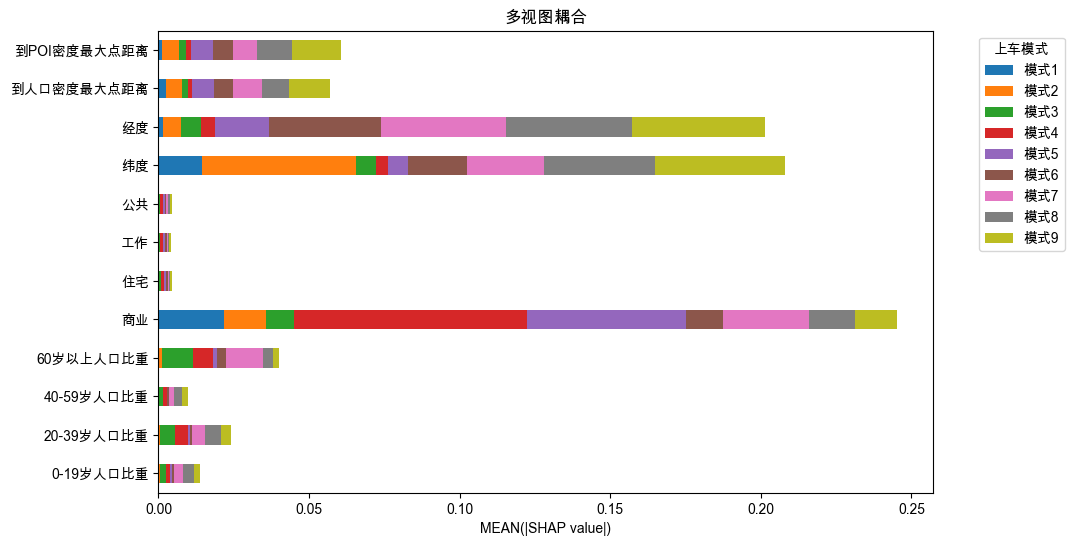

In [50]:
df = []
for cls_id in range(len(all_view_up_shap_values)):
    cls_pop_shap_values_up = all_view_up_shap_values[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重','商业','住宅', '工作', '公共','纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
class_name = [f'模式{cls_id+1}' for cls_id in range(9)]
df = pd.DataFrame(df, index=name, columns=class_name)
df = df.iloc[1:]
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_9)

# 设置标题和标签
ax.set_title('多视图耦合')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='上车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

100%|██████████| 100/100 [02:03<00:00,  1.23s/it]


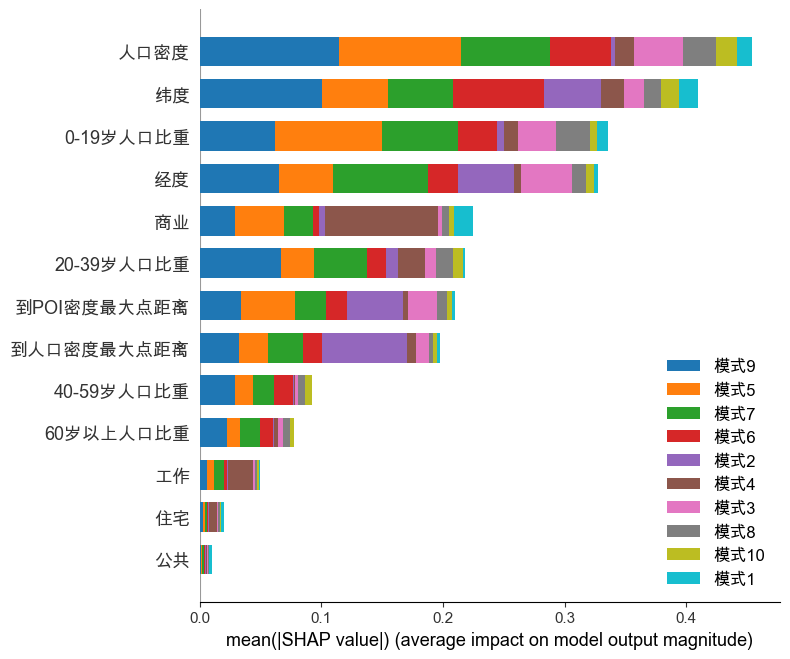

In [47]:
all_pop_view_down_result = pop_model_down.predict(np.array(pop_x))
all_func_view_down_result = func_model_down.predict(np.array(func_x))
all_spa_view_down_result = spa_model_down.predict(np.array(spa_x))
all_all_view_down = np.array([all_pop_view_down_result,all_func_view_down_result,all_spa_view_down_result]).T
all_down_rf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=seed)
all_down_rf.fit(all_all_view_down, np.array(down_y))
def all_view_down_model(X):
    all_pop_view_down_result = pop_model_down.predict(X[:,0:5])
    all_func_view_down_result = func_model_down.predict(X[:,5:9])
    all_spa_view_down_result = spa_model_down.predict(X[:,9:13])
    
    all_all_view_down = np.array([all_pop_view_down_result,all_func_view_down_result,all_spa_view_down_result]).T
    return all_down_rf.predict_proba(all_all_view_down)

fn = ['pop_dens','age_0_19', 'age_20_39', 'age_40_59', 'age_60', 'lu_comm', 'lu_res', 'lu_work', 'lu_pub', 'lat', 'lon', 'dis_pop', 'dis_poi']
all_view_down_explainer = shap.KernelExplainer(all_view_down_model, shap.sample(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)),50))
all_view_down_shap_values = all_view_down_explainer.shap_values(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:100]))
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重','商业','住宅', '工作', '公共','纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
shap.summary_plot(all_view_down_shap_values, pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:100], plot_type="bar", color_bar=colors_10, class_names=class_name, color_bar_label=class_name,feature_names=name,color=cmap,cmap=cmap, show=False)
ax.legend(loc='lower right',ncol=1)
ax.set_xlabel('MEAN(|SHAP value|)')
ax.title.set_text('下车')
plt.savefig('all_all_down.png')
plt.show()
#all_view_down_shap_inter =  all_view_down_explainer.shap_interaction_values(np.array(pd.concat([pop_x, func_x, spa_x],ignore_index=True, axis=1)[0:10]))

                  模式1       模式2       模式3       模式4       模式5       模式6  \
0-19岁人口比重    0.009010  0.005539  0.031127  0.011414  0.087663  0.032057   
20-39岁人口比重   0.001412  0.009493  0.008262  0.022597  0.027022  0.015806   
40-59岁人口比重   0.000688  0.000924  0.002019  0.001138  0.014653  0.015503   
60岁以上人口比重    0.000584  0.000989  0.004173  0.003271  0.010789  0.010657   
商业           0.015614  0.005274  0.003400  0.092900  0.040123  0.004487   
住宅           0.002492  0.001272  0.000755  0.006897  0.001383  0.000704   
工作           0.001482  0.001157  0.001687  0.020566  0.005833  0.002205   
公共           0.002058  0.001298  0.000802  0.000643  0.000849  0.000715   
纬度           0.015378  0.046730  0.016176  0.019446  0.054679  0.074374   
经度           0.003270  0.045341  0.042107  0.006239  0.044799  0.025354   
到人口密度最大点距离   0.002332  0.069802  0.010276  0.007859  0.023745  0.015226   
到POI密度最大点距离  0.002326  0.045823  0.024347  0.003858  0.044053  0.017566   

                  模式7   

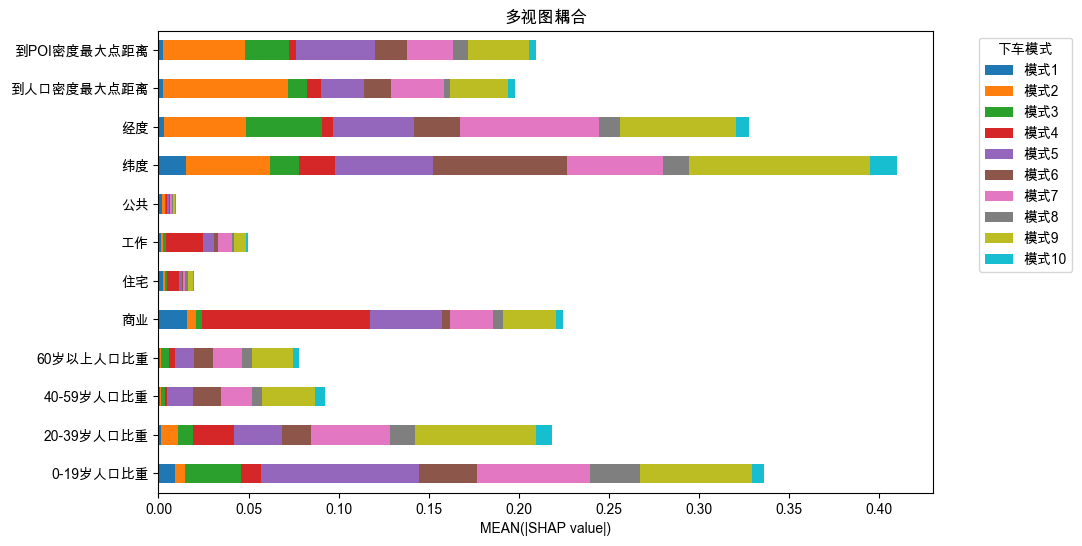

In [51]:
df = []
for cls_id in range(len(all_view_down_shap_values)):
    cls_pop_shap_values_up = all_view_down_shap_values[cls_id]
    cls_pop_shap_values_up = np.abs(cls_pop_shap_values_up)
    cls_pop_shap_values_up = np.mean(cls_pop_shap_values_up, axis=0)
    df.append(cls_pop_shap_values_up.T)
df = np.array(df).T
name = ['人口密度','0-19岁人口比重', '20-39岁人口比重', '40-59岁人口比重', '60岁以上人口比重','商业','住宅', '工作', '公共','纬度','经度', '到人口密度最大点距离', '到POI密度最大点距离']
class_name = [f'模式{cls_id+1}' for cls_id in range(10)]
df = pd.DataFrame(df, index=name, columns=class_name)
df = df.iloc[1:]
print(df)
# 绘制堆积条形图
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='barh', stacked=True, ax=ax, color=colors_10)

# 设置标题和标签
ax.set_title('多视图耦合')
ax.set_xlabel('MEAN(|SHAP value|)')
ax.set_ylabel('')

# 添加图例
ax.legend(title='下车模式', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

In [29]:
import os
from collections import defaultdict

def read_csv_files_and_count():
    
    
    # 获取当前文件夹下的所有csv文件
    csv_files = [f for f in os.listdir('/Users/wenhuizhang/UCAS/City_GIS/0913') if f.endswith('.csv')]
    
    # 按文件开头的前两个字符进行分组
    file_groups = defaultdict(list)
    for file in csv_files:
        prefix = file[:2]
        file_groups[prefix].append(file)
    
    # 逐个处理分组
    for prefix, files in file_groups.items():
        print(f"Processing files with prefix {prefix}: {files}")
        # 初始化hashmap
        station_count_map = defaultdict(int)
        for file in files:
            # 读取csv文件
            df = pd.read_csv(f'/Users/wenhuizhang/UCAS/City_GIS/0913/{file}')
            
            # 检查是否存在“车站名”列
            if 'StopName' not in df.columns:
                print(f"Warning: 'StopName' column not found in {file}")
                continue
            
            # 统计相同车站名的行数并更新到hashmap
            station_counts = df['StopName'].value_counts()
            for station_name, count in station_counts.items():
                station_count_map[station_name] += count
    
        # 输出最终的hashmap结果
        output = pd.DataFrame(list(station_count_map.items()), columns=['StationName', 'Count'])
        output.to_csv(f'/Users/wenhuizhang/UCAS/City_GIS/0913/{prefix}_station_count.csv', index=False)

# 调用函数
read_csv_files_and_count()


Processing files with prefix 02: ['02-20-00-02-39-59_part1.csv', '02-00-00-02-19-59_part1.csv', '02-40-00-02-59-59_part1.csv']
Processing files with prefix 18: ['18-00-00-18-19-59_part1.csv', '18-40-00-18-59-59_part1.csv', '18-20-00-18-39-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 13: ['13-40-00-13-59-59_part1.csv', '13-00-00-13-19-59_part1.csv', '13-20-00-13-39-59_part1.csv']
Processing files with prefix 07: ['07-00-00-07-19-59_part1.csv', '07-40-00-07-59-59_part1.csv', '07-20-00-07-39-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 19: ['19-00-00-19-19-59_part1.csv', '19-40-00-19-59-59_part1.csv', '19-20-00-19-39-59_part1.csv']
Processing files with prefix 03: ['03-20-00-03-39-59_part1.csv', '03-00-00-03-19-59_part1.csv', '03-40-00-03-59-59_part1.csv']
Processing files with prefix 12: ['12-40-00-12-59-59_part1.csv', '12-00-00-12-19-59_part1.csv', '12-20-00-12-39-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 06: ['06-00-00-06-19-59_part1.csv', '06-40-00-06-59-59_part1.csv', '06-20-00-06-39-59_part1.csv']
Processing files with prefix 05: ['05-00-00-05-19-59_part1.csv', '05-40-00-05-59-59_part1.csv', '05-20-00-05-39-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 11: ['11-40-00-11-59-59_part1.csv', '11-00-00-11-19-59_part1.csv', '11-20-00-11-39-59_part1.csv']
Processing files with prefix 00: ['00-20-00-00-39-59_part1.csv', '00-00-00-00-19-59_part1.csv', '00-40-00-00-59-59_part1.csv']
Processing files with prefix 04: ['04-00-00-04-19-59_part1.csv', '04-40-00-04-59-59_part1.csv', '04-20-00-04-39-59_part1.csv']
Processing files with prefix 10: ['10-40-00-10-59-59_part1.csv', '10-00-00-10-19-59_part1.csv', '10-20-00-10-39-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 01: ['01-20-00-01-39-59_part1.csv', '01-00-00-01-19-59_part1.csv', '01-40-00-01-59-59_part1.csv']
Processing files with prefix 08: ['08-20-00-08-39-59_part1.csv', '08-40-00-08-59-59_part1.csv', '08-00-00-08-19-59_part1.csv']
Processing files with prefix 17: ['17-20-00-17-39-59_part1.csv', '17-40-00-17-59-59_part1.csv', '17-00-00-17-19-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 09: ['09-20-00-09-39-59_part1.csv', '09-40-00-09-59-59_part1.csv', '09-00-00-09-19-59_part1.csv']
Processing files with prefix 16: ['16-20-00-16-39-59_part1.csv', '16-40-00-16-59-59_part1.csv', '16-00-00-16-19-59_part1.csv']


Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


Processing files with prefix 15: ['15-20-00-15-39-59_part1.csv', '15-40-00-15-59-59_part1.csv', '15-00-00-15-19-59_part1.csv']
Processing files with prefix 14: ['14-20-00-14-39-59_part1.csv', '14-40-00-14-59-59_part1.csv', '14-00-00-14-19-59_part1.csv']
Processing files with prefix 23: ['23-00-00-23-19-59_part1.csv', '23-40-00-23-59-59_part1.csv', '23-20-00-23-39-59_part1.csv']
Processing files with prefix 22: ['22-00-00-22-19-59_part1.csv', '22-40-00-22-59-59_part1.csv', '22-20-00-22-39-59_part1.csv']
Processing files with prefix 21: ['21-00-00-21-19-59_part1.csv', '21-40-00-21-59-59_part1.csv', '21-20-00-21-39-59_part1.csv']
Processing files with prefix 20: ['20-00-00-20-19-59_part1.csv', '20-40-00-20-59-59_part1.csv', '20-20-00-20-39-59_part1.csv']
